# Crop Yield prediction as per country

### Step 1 : Business Problem Understanding¶
Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\kdhak\Downloads\yield_df.csv")
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


#### Above dataset contains 28242 records with 8 columns/variables


#### Area : It describe the area in which the crops grows
#### Item : It indicate the name of the crops
#### hg/ha_yield : TotalYeilds
#### Year  : It indicate the year of crops grow
#### average_rain_fall_mm_per_year : This variable indicate the average rain fall in mm per year
#### pesticides_tonnes : It indicate how much pesticides uses in tonnes
#### avg_temp : It indicate the Average temprature of area

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


#### we have some categorical columns so we have to convert that data into numerical data for further analysis .

#### by observing this we can conclude that it supervised learning problem
#### it is an regression problem because ouput variables are numerical so it is continuos data


### dropping irrevant data 

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [13]:
df.rename(columns={'hg/ha_yield': 'hectogram_per_hectare'}, inplace=True)


In [14]:
df.shape

(28242, 7)

### Finding null values in percentage 

In [16]:
(df.isnull().sum()/df.shape[0])*100

Area                             0.0
Item                             0.0
Year                             0.0
hectogram_per_hectare            0.0
average_rain_fall_mm_per_year    0.0
pesticides_tonnes                0.0
avg_temp                         0.0
dtype: float64

### finding duplicates

In [18]:
df.duplicated().sum()

2310

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

### ### statistical view of data 

In [22]:
df.describe()

,Year,hectogram_per_hectare,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


## Transforming  average_rain_fall_mm_per_year

##### values in this particular column are not numeric strings so these rows can be considered 
##### for removel or further processing , depending on the specific use case  

In [25]:
df['average_rain_fall_mm_per_year'].value_counts()

average_rain_fall_mm_per_year
1083.0    3384
1761.0    1854
758.0     1280
534.0      966
494.0      966
          ... 
641.0       42
626.0       42
847.0       39
83.0        29
241.0       24
Name: count, Length: 100, dtype: int64

In [26]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

In [27]:
df.head()

,Area,Item,Year,hectogram_per_hectare,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# Visualising the data 

In [157]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

## Visualizing area_per_country 

<Axes: xlabel='count', ylabel='Area'>

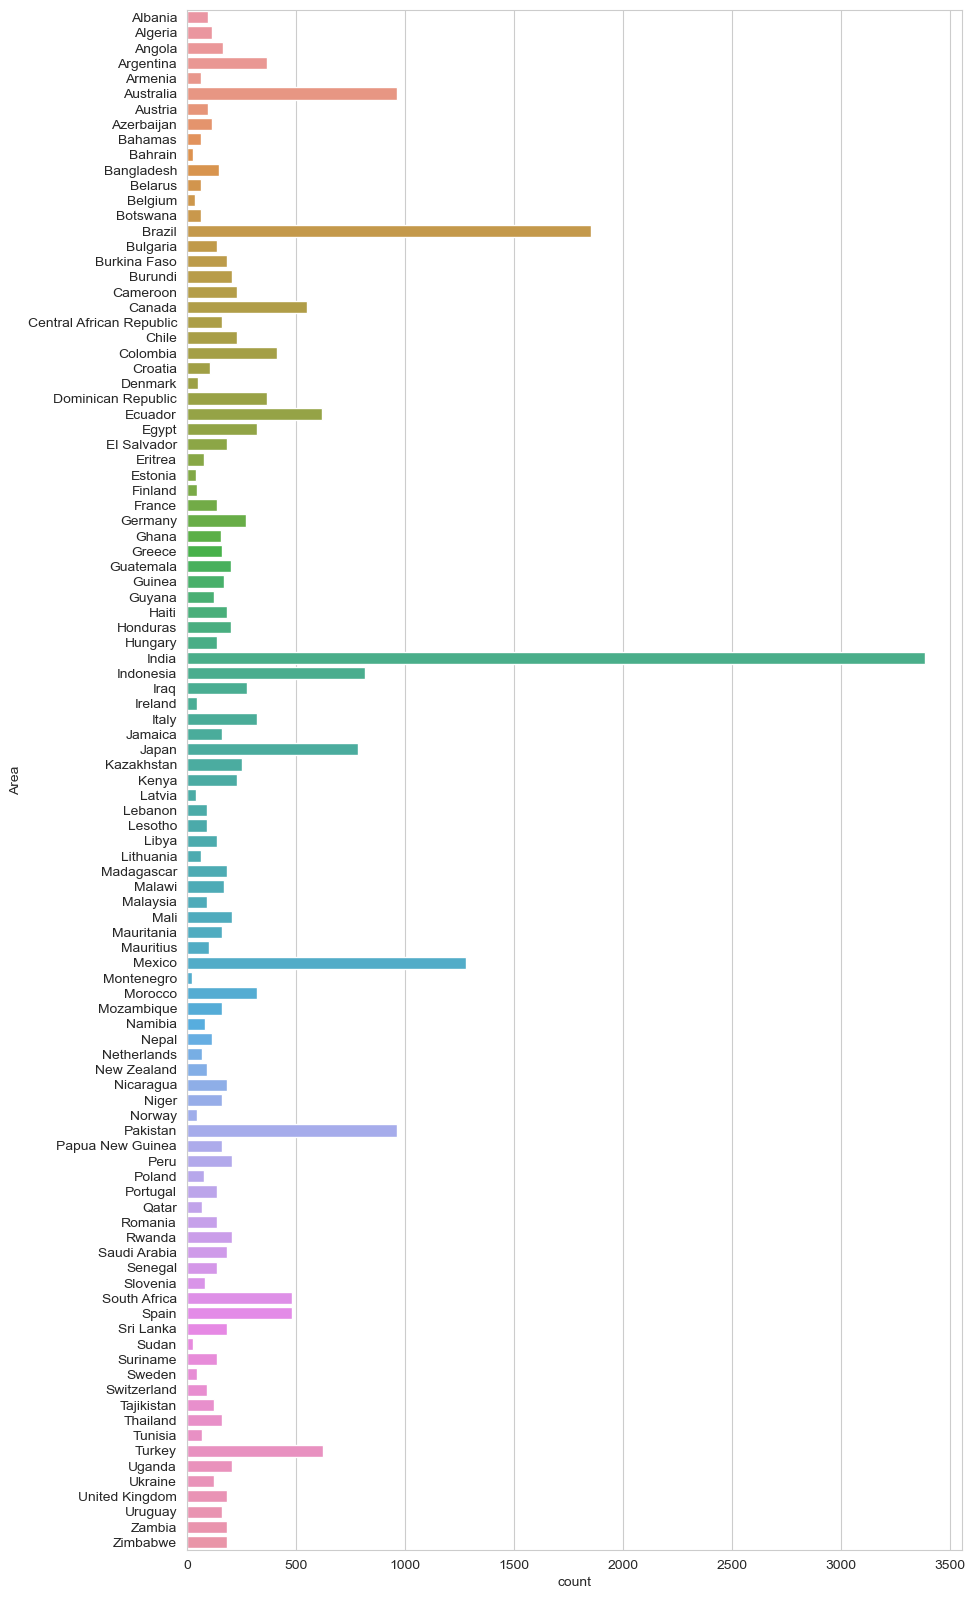

In [31]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

In [32]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

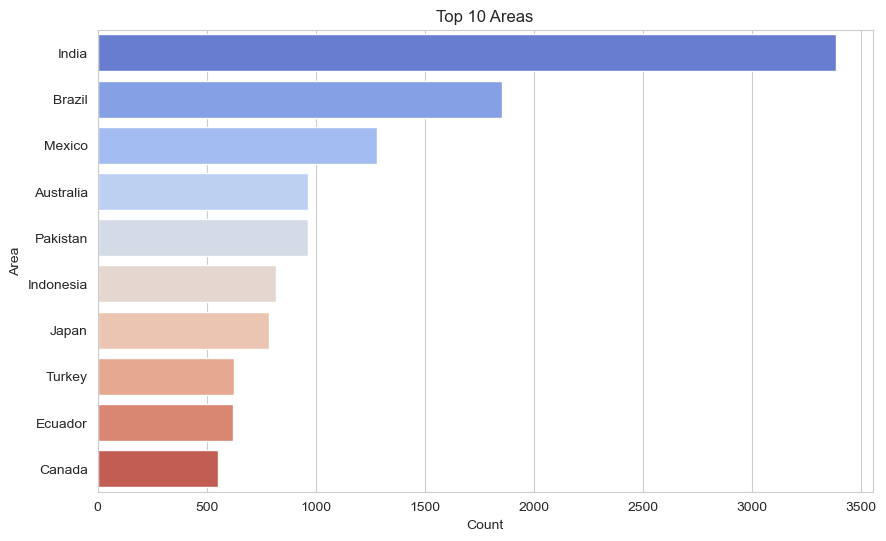

In [33]:
plt.figure()
area_counts = df['Area'].value_counts().head(10)
sns.barplot(x=area_counts.values, y=area_counts.index, palette='coolwarm')
plt.title('Top 10 Areas')
plt.xlabel('Count')
plt.ylabel('Area')
plt.show()

### after analysing this graph we can easily observe that, which country produces more crop yeild  or occupies more area 

In [159]:
item_counts = df['Item'].value_counts()

In [161]:
item_counts

Item
Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64

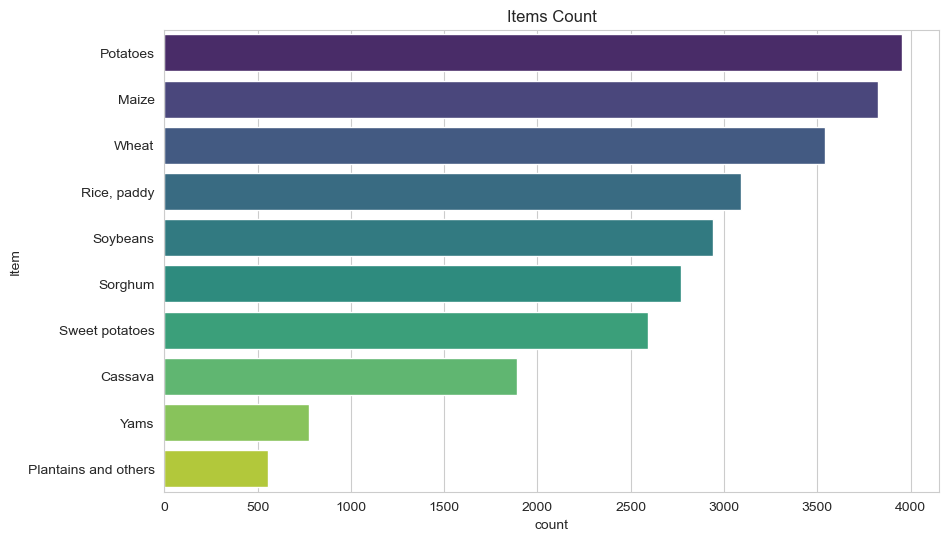

In [163]:
plt.figure()
item_counts = df['Item'].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')
plt.title('Items Count')
plt.xlabel('count')
plt.ylabel('Item')

plt.show()

##  visualize which crops are most and least common.
### ===>"Item" column  directly represents the type of crop.
### ===> Counting each unique crop item and plotting these counts will show the distribution of crops across your dataset.
 ### ===>visualize which crops are most and least common.

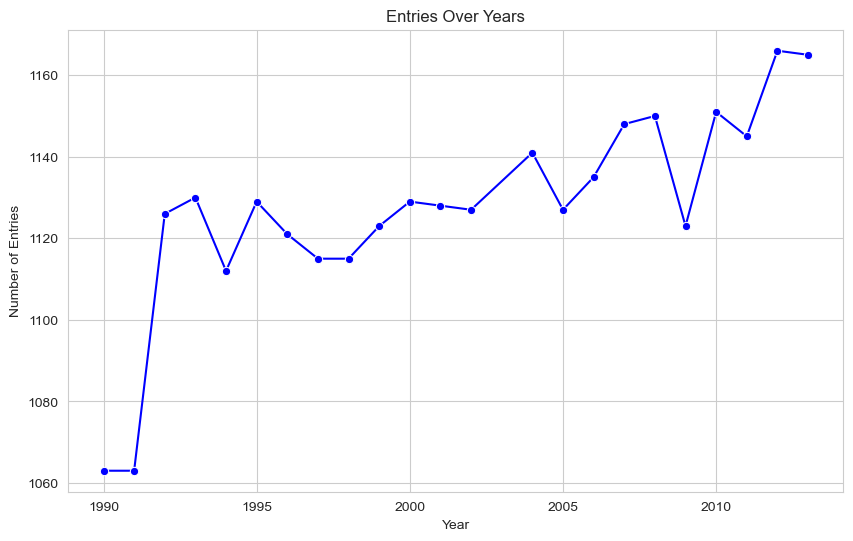

In [39]:
plt.figure()
year_counts = df['Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='b')
plt.title('Entries Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.show()

 Steady Rise: From 1989 to 1990, there's a notable increase in the number of entries.
This sharp rise hints at a significant event or change during that period.
Fluctuations with Upward Trend: Post-1990, the entries fluctuate but generally trend upwards,
indicating a growing dataset or increased activity over the years.
if  data on hectograms aligns with these entries, you might expect it to follow a similar increasing pattern year over year.
Could be a good sign for productivity!


### as we can notice encreasing number of entries is showing number of increase in productivity in agricultural industry.

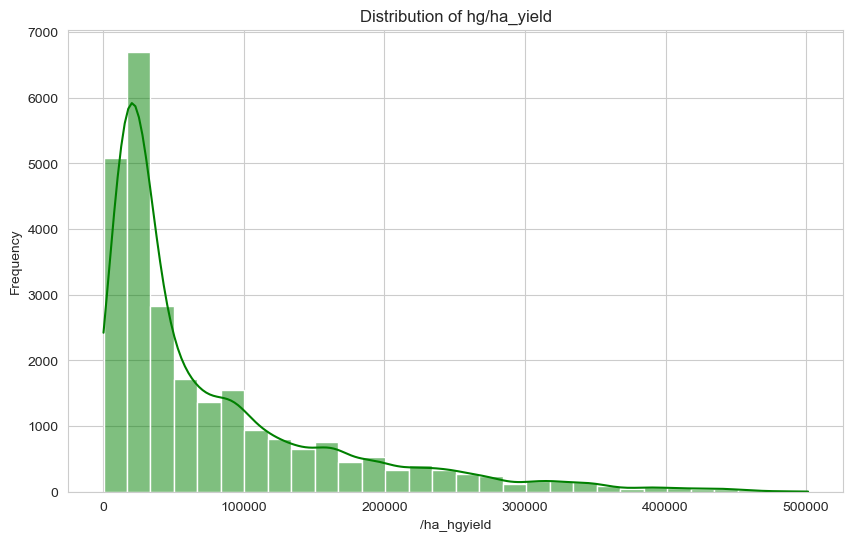

In [42]:
plt.figure()
sns.histplot(df['hectogram_per_hectare'], bins=30, kde=True, color='g')
plt.title('Distribution of hg/ha_yield')
plt.xlabel('/ha_hgyield')
plt.ylabel('Frequency')
plt.show()

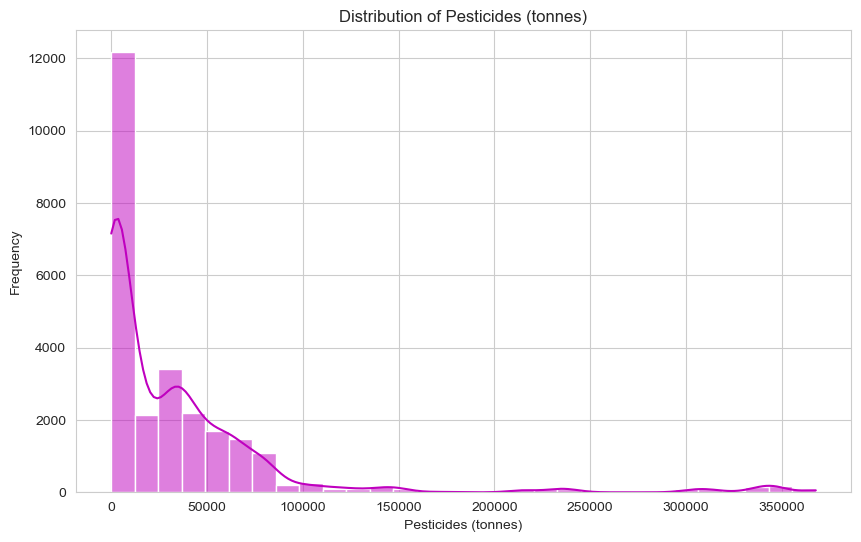

In [43]:
plt.figure()
sns.histplot(df['pesticides_tonnes'], bins=30, kde=True, color='m')
plt.title('Distribution of Pesticides (tonnes)')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Frequency')
plt.show()

### This graph is crucial for understanding how pesticide usage varies and helps
### in making informed decisions in agricultural planning and environmental policies.

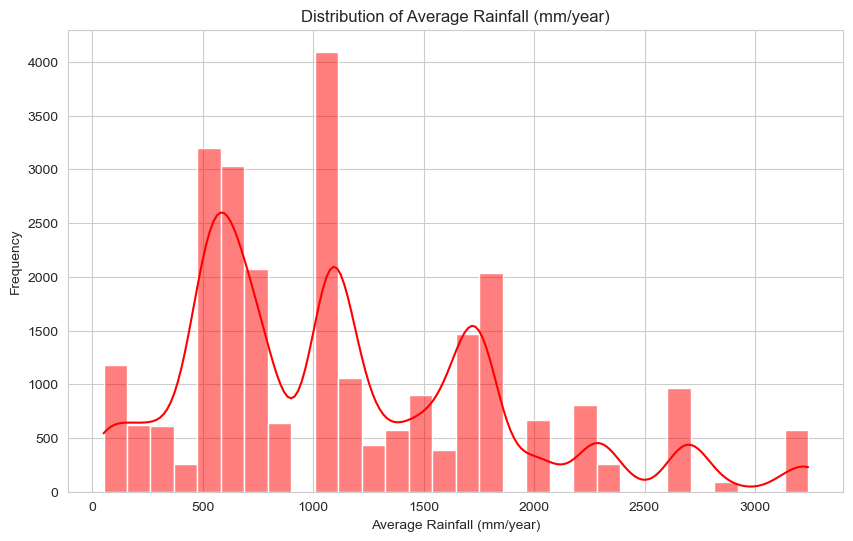

In [45]:
plt.figure()
sns.histplot(df['average_rain_fall_mm_per_year'], bins=30, kde=True, color='r')
plt.title('Distribution of Average Rainfall (mm/year)')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Frequency')
plt.show()

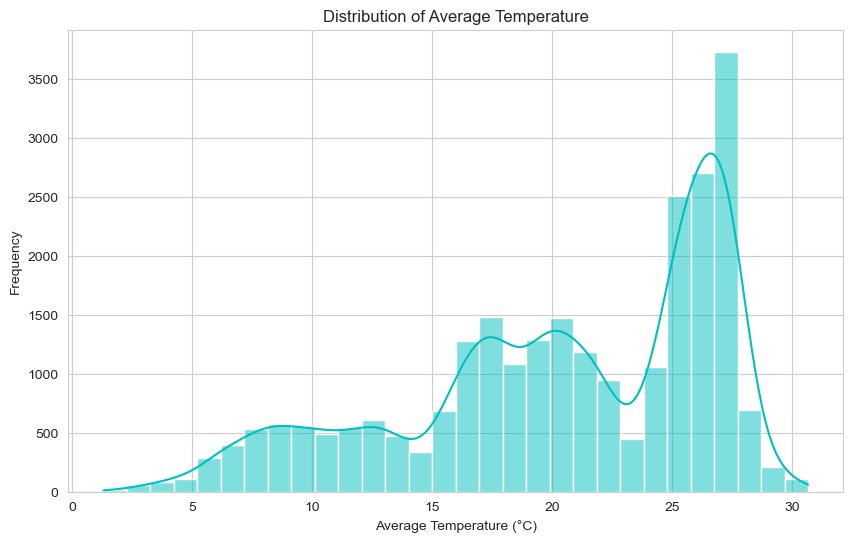

In [46]:
plt.figure()
sns.histplot(df['avg_temp'], bins=30, kde=True, color='c')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

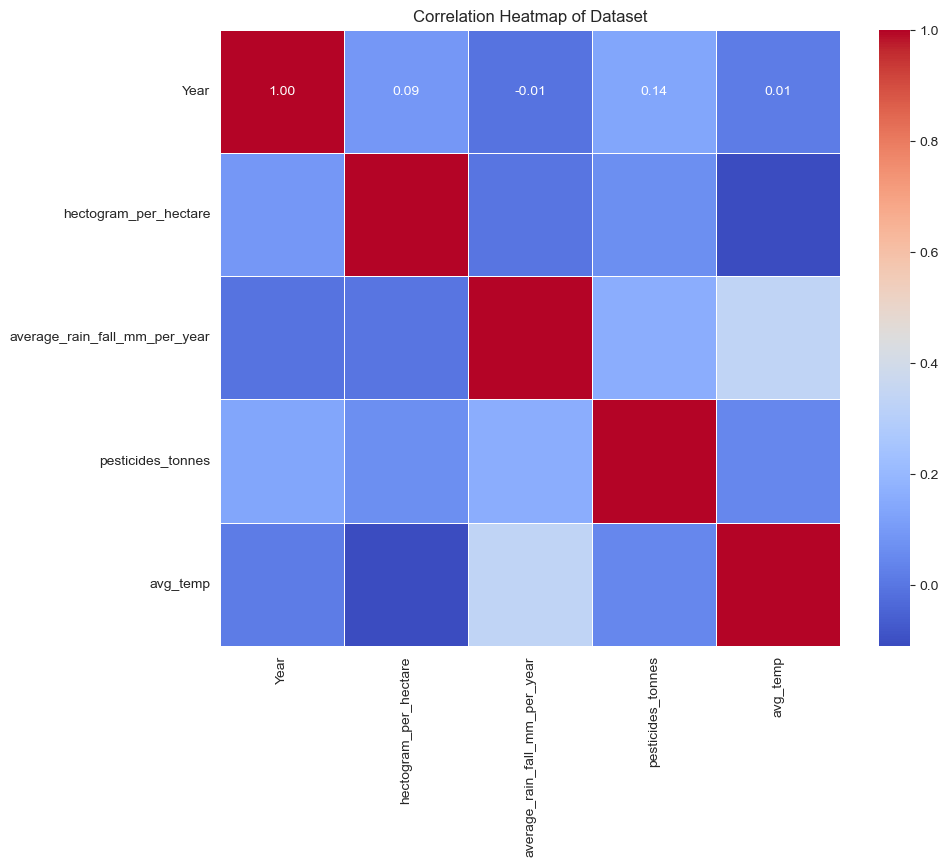

In [47]:
corr_matrix = df.corr(numeric_only=True)
 
 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Dataset')

plt.show()

### Yeild_per_country

In [49]:
country=(df['Area'].unique())

In [173]:
country

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [51]:
Yeild_per_country =[]
for state in country:
    Yeild_per_country.append(df[df['Area']==state]['hectogram_per_hectare'].sum())

In [52]:
Yeild_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

In [53]:
df['hectogram_per_hectare'].sum()

1996196943

### This show us distribution of  yeild all over the world

In [55]:
df['Item'].value_counts()

Item
Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Item'>

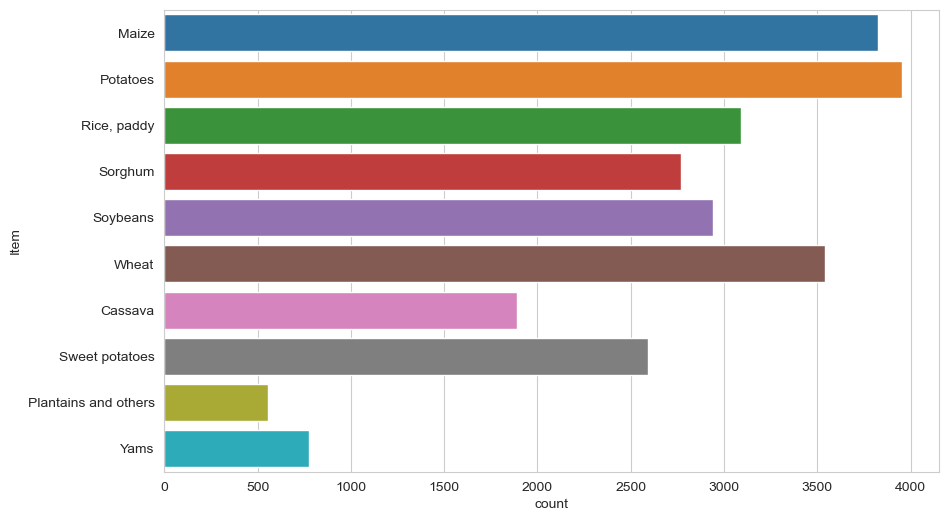

In [56]:
sns.countplot(y=df['Item'])           # total yeilds

## Yeild Vs Item 

In [58]:
crops = (df['Item'].unique())

In [59]:
yeild_per_item=[]
for crop in crops:
    yeild_per_item.append(df[df['Item']==crop]['hectogram_per_hectare'].sum())
    

In [60]:
yeild_per_item

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

<Axes: >

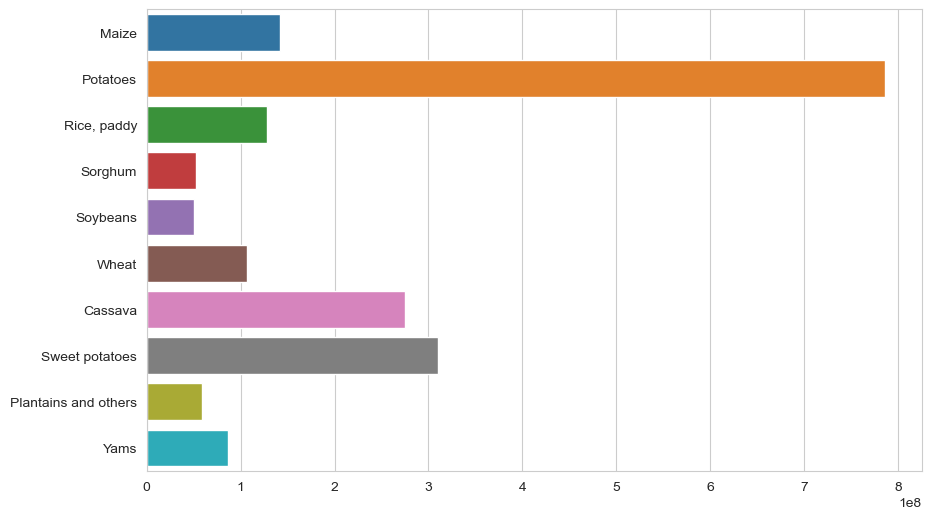

In [61]:
sns.barplot(y=crops,x=yeild_per_item)

### Train_test split

In [63]:
col =['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hectogram_per_hectare']
df= df[col]


In [64]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hectogram_per_hectare
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [65]:
x= df.iloc[:,:-1]

In [66]:
y= df.iloc[:,-1]

In [67]:
x

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
0,1990,1485.0,121.00,16.37,Albania,Maize
1,1990,1485.0,121.00,16.37,Albania,Potatoes
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy"
3,1990,1485.0,121.00,16.37,Albania,Sorghum
4,1990,1485.0,121.00,16.37,Albania,Soybeans
...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy"
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes


In [68]:
y

0        36613
1        66667
2        23333
3        12500
4         7000
         ...  
28237    22581
28238     3066
28239    13142
28240    22222
28241    22888
Name: hectogram_per_hectare, Length: 25932, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 42)

In [71]:
X_train.shape

(20745, 6)

In [72]:
X_test.shape


(5187, 6)

In [73]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652.0,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240.0,98328.63,27.51,Colombia,Maize
28212,2010,657.0,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410.0,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854.0,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537.0,36572.75,7.85,Canada,Wheat
860,1991,534.0,17866.00,18.73,Australia,Potatoes
17223,1998,250.0,6416.14,6.94,Kazakhstan,Potatoes


## Converting Categorical to Numerical and Scalling the values

In [75]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [76]:
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [77]:
preprocessor = ColumnTransformer(
transformers=[
    ('onehoencoder',ohe,[4,5]),
    ('Standrization',scaler,[0,1,2,3])
],
remainder='passthrough'    
)

In [78]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehoencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('Standrization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [79]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

## Training Models

In [81]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  mean_squared_error,r2_score

In [175]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'dtr':DecisionTreeRegressor()
    }

for name,mod in models.items():
    mod.fit(X_train_dummy,y_train)
    y_pred = mod.predict(X_test_dummy)

    print(f'{name} MSE : {np.sqrt(mean_squared_error(y_test,y_pred))} Score {r2_score(y_test,y_pred)}')


lr MSE : 42681.49084093676 Score 0.7486565885228218
lss MSE : 42687.634723648356 Score 0.7485842229351424
rg MSE : 42691.2241945484 Score 0.7485419396105438
dtr MSE : 12634.449033571522 Score 0.9779757585391111


## Select Model

In [177]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([154330.,  15838.,  72614., ...,  52692.,   9621., 128507.])

In [85]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results_df

,Actual,Predicted
345,155782,154330.0
26405,15787,15838.0
27032,72614,72614.0
24736,30774,22916.0
6053,28085,28645.0
...,...,...
19986,212942,212942.0
6994,49278,41144.0
27921,48705,52692.0
13777,9621,9621.0


## Predicitive System

In [87]:
def predicition(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
    featrues = np.array([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]])

    transformed_features = preprocessor.transform(featrues)
    predicted_value = dtr.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]
    

##### checking production of yeild on the basis of year,
##### average_rain_fall_mm_per_year
##### pestisides
##### temperature
##### and crop item

In [89]:
Year=int(input("enter a year:")) 
average_rain_fall_mm_per_year =eval(input("enter average rainfall_mm_per_year:"))
pesticides_tonnes = eval(input("enter pestisides tones:"))
avg_temp =eval(input("enter average temperature:"))
Area = input("Enter a country name in which you want to grow crop")
Item = input("enter crop type:")

result=predicition(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item)
print(f"The crop yeild produce in {Area} will be {result} hectogram per hectare")

enter a year: 2014
enter average rainfall_mm_per_year: 43
enter pestisides tones: 543
enter average temperature: 65
Enter a country name in which you want to grow crop India
enter crop type: Maize


The crop yeild produce in India will be [72257.] hectogram per hectare


## Conclusion 

# Summary Report

## Decision Tree Regressor (DTR)

### Best Model¶
Decision Tree Regressor (DTR) is the best model based on the lowest MSE and highest R² score. This indicates it provides the most accurate predictions and the best fit for the data.

In [183]:
list=[1,1,2,2,3,3,4,4]
li=[]
for i in list:
    if count(i)==1:
        li.append(i)
        print(i)
        

NameError: name 'count' is not defined

In [189]:
list=[1,1,2,2,3,3,4,4]
sum=0
for i in list:
    if i%2!=0:
        sum=sum+i
    print(i)
  
  

1
1
2
2
3
3
4
4
